# Importing packages and reading in the csv file

In [4]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization, Flatten
from keras.metrics import AUC, Precision, Recall, F1Score
from keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from keras.optimizers import Adam, RMSprop, Adadelta, Adagrad, AdamW, Adamax
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import plot_model

In [5]:
X_train = pd.read_csv("./tt_data/X_train_final_mlp.csv")
y_train = pd.read_csv("./tt_data/y_train_final_mlp.csv")
X_test = pd.read_csv("./tt_data/X_test_final_mlp.csv")
y_test = pd.read_csv("./tt_data/y_test_final_mlp.csv")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train

(423, 57)
(423, 1)
(106, 57)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,1.212838,1.138042,1.784158,-1.974369,1.714235,1,1.032154,-0.155302,-0.062256,-0.052340,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.212838,-0.738207,-0.519094,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.059495,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.668536,1.098769,1,-0.413545,0.542465,0.300274,-0.095708,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.007810,-1.157939,1,-0.413545,2.727182,-0.076965,-0.067672,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.031939,1.138042,2.551909,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.072053,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,-0.415256,1.211143,-0.519094,0.007810,0.278148,0,-0.413545,-0.194309,-0.147713,-0.097607,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
419,-0.777055,-0.299603,3.319660,0.007810,-0.542473,0,-0.413545,-0.194309,-0.147713,-0.080522,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
420,0.670140,-0.445804,0.248657,-0.652916,1.509080,1,1.032154,-0.194309,-0.147713,-0.050149,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
421,0.851040,0.236468,-0.519094,-1.974369,0.483303,0,-0.413545,-0.194309,-0.147713,-0.084903,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


# Sets a random seed to ensure reproducible results

In [6]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
"""
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)"
"""

'\nfrom keras import backend as K\nsession_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)\nsess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)\ntf.compat.v1.keras.backend.set_session(sess)"\n'

# Finding the class weights to resolve the issue of class imbalance

In [7]:
df = pd.concat([y_train, y_test], axis=0)
df 

,PCOS (Y/N)
0,1
1,0
2,0
3,0
4,0
...,...
101,0
102,0
103,0
104,0


In [8]:
target_counts = np.bincount(df["PCOS (Y/N)"])
weight_for_0 = 1.0/target_counts[0]
weight_for_1 = 1.0/target_counts[1]

# Splitting the training dataset into train and validation datasets

In [9]:
# Choose either 60, 20, 20 or 80, 10, 10
# Depends on the complexity of the model, the dataset size and the nature of the data

test_size = 0.25
random_state = 1

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, stratify=y_train, random_state=random_state)

# Building a neural network (Keras Functional API)

In [10]:
inputs = Input(shape=X_train.shape[1:])
x = Dense(32, activation="relu")(inputs)
x = Dense(32, activation="relu")(x)
x = Dropout(rate=0.2, seed=1)(x)
x = Dense(32, activation="relu")(x)
x = BatchNormalization()(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,129 (16.13 KB)

 Trainable params: 4,065 (15.88 KB)

 Non-trainable params: 64 (256.00 B)

In [11]:
plot_model(model, "my_first_model.png", show_shapes=True)

"dot" with args ['-Tps', 'C:\\Users\\Stacy\\AppData\\Local\\Temp\\tmpmtu8jsv7\\tmpor2ut1l3'] returned code: 3221225477

stdout, stderr:
 b''
b''



AssertionError: "dot" with args ['-Tps', 'C:\\Users\\Stacy\\AppData\\Local\\Temp\\tmpmtu8jsv7\\tmpor2ut1l3'] returned code: 3221225477

In [12]:
my_callbacks = [
    #keras.callbacks.EarlyStopping(patience=2, min_delta=0.0012),
    #keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    #keras.callbacks.TensorBoard(log_dir='./logs')
]

In [13]:
model.compile(loss= BinaryCrossentropy() , optimizer=Adam() , metrics=[AUC, Precision, Recall]) 
history = model.fit(x=X_train, y=y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val), class_weight={0: weight_for_0, 1: weight_for_1}, callbacks=my_callbacks)
test_loss, test_auc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=2)
print(test_loss, test_auc, test_precision, test_recall)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - auc: 0.5521 - loss: 0.0029 - precision: 0.3468 - recall: 0.5916 - val_auc: 0.5029 - val_loss: 0.6765 - val_precision: 0.4000 - val_recall: 0.0588
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.6969 - loss: 0.0024 - precision: 0.4437 - recall: 0.6985 - val_auc: 0.6413 - val_loss: 0.6591 - val_precision: 0.7500 - val_recall: 0.1765
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 0.7295 - loss: 0.0023 - precision: 0.4460 - recall: 0.7725 - val_auc: 0.7269 - val_loss: 0.6439 - val_precision: 0.8333 - val_recall: 0.2941
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - auc: 0.8092 - loss: 0.0021 - precision: 0.4986 - recall: 0.8428 - val_auc: 0.7886 - val_loss: 0.6277 - val_precision: 0.8462 - val_recall: 0.3235
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 0.8732 - loss: 0.0018 - precision: 0.5628 - recall: 0.8953 - val_auc: 0.8321 - val_loss: 0.6089 - val_precision: 0.8571 - val_recall: 0.3529
Epoch 6/50
5/5

# Using Keras_tuner

In [14]:
import keras_tuner
class MyHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        # Tune the number of layers.
        inputs = Input(shape=X_train.shape[1:])
        x = Dense(32, activation="relu")(inputs)
        for i in range(hp.Int("num_layers", 1, 4)):
            x = Dense(
                    # Tune number of units separately.
                    units=hp.Int(f"units_{i}", min_value=32, max_value=320, step=32),
                    activation=hp.Choice(f"activation_{i}", ["relu", "tanh"])
                )(x)
        if hp.Boolean("dropout"):
            x = (Dropout(rate=hp.Float("dropout_rate", min_value=0.1, max_value=0.3, step=0.1)))(x)
        if hp.Boolean("batch_norm"): 
            x = BatchNormalization()(x)
        outputs = Dense(1, activation="sigmoid")(x)
        model = Model(inputs=inputs, outputs=outputs) 
        learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
        model.compile(loss=BinaryCrossentropy(), optimizer=Adam(learning_rate=learning_rate) , metrics=[AUC]) 
        return model

    # It is generally not needed to tune the number of epochs because a built-in callback is passed to model.fit()
    # to save the model at its best epoch evaluated by the validation_data.
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Int("batch_size", min_value=32, max_value=128, step=32),
            **kwargs
        )

In [15]:
# Quick check to see if the code is working correctly
hp = keras_tuner.HyperParameters()
hypermodel = MyHyperModel()
model = hypermodel.build(hp)
hypermodel.fit(hp, model, x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight={0: weight_for_0, 1: weight_for_1})

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - auc_1: 0.6429 - loss: 0.0025 - val_auc_1: 0.5770 - val_loss: 0.6856


During the search, the model-building function is called with different hyperparameter values in different trial. In each trial, the tuner would generate a new set of hyperparameter values to build the model. The model is then fit and evaluated. The metrics are recorded. The tuner progressively explores the space and finally finds a good set of hyperparameter values.

In [16]:
# Select a tuner class: RandomSearch, BayesianOptimization and Hyperband (Each corresponds to one tuning algorithm.)
tuner = keras_tuner.RandomSearch(
    hypermodel=MyHyperModel(),
    objective=keras_tuner.Objective("val_auc", direction="max"),
    max_trials=5,
    overwrite=True,
    directory="neural_network_results",
    project_name="tune_hypermodel"
)
tuner.search_space_summary()


Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 320, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
batch_norm (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [17]:
tuner.search(x=X_train, y=y_train, validation_data=(X_val, y_val), class_weight={0: weight_for_0, 1: weight_for_1}, callbacks=my_callbacks)
tuner.results_summary()

Trial 5 Complete [00h 00m 03s]
val_auc: 0.9350489377975464

Best val_auc So Far: 0.9466911554336548
Total elapsed time: 00h 00m 15s
Results summary
Results in neural_network_results\tune_hypermodel
Showing 10 best trials
Objective(name="val_auc", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 1
units_0: 64
activation_0: tanh
dropout: True
batch_norm: False
lr: 0.008516344844733455
units_1: 192
activation_1: relu
units_2: 256
activation_2: tanh
batch_size: 128
units_3: 320
activation_3: relu
dropout_rate: 0.1
Score: 0.9466911554336548

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 192
activation_0: relu
dropout: False
batch_norm: True
lr: 0.005283071526371937
units_1: 256
activation_1: relu
units_2: 32
activation_2: relu
batch_size: 32
units_3: 64
activation_3: relu
dropout_rate: 0.2
Score: 0.9350489377975464

Trial 3 summary
Hyperparameters:
num_layers: 4
units_0: 96
activation_0: relu
dropout: True
batch_norm: False
lr: 0.004116823186183904
units_1: 288
activ

In [18]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

# Retraining and evaluation

In [19]:
best_hps = tuner.get_best_hyperparameters(1)
# Build the model with the best hp.
hypermodel = MyHyperModel()
model = hypermodel.build(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))
history = model.fit(x=x_all, y=y_all, epochs=3, class_weight={0: weight_for_0, 1: weight_for_1})
test_loss, test_auc = model.evaluate(X_test, y_test, verbose=2)
print(test_loss, test_auc)

Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - auc: 0.8182 - loss: 0.0019
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.9677 - loss: 8.2966e-04 
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.9733 - loss: 7.9334e-04 
4/4 - 0s - 75ms/step - auc: 0.9506 - loss: 0.5064
0.5063939094543457 0.9505718350410461


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


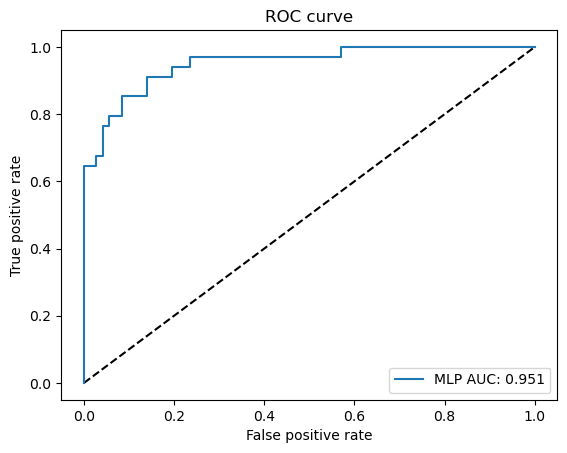

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='MLP AUC: {:.3f}'.format(test_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Finding the best threshold

In [21]:
# This method minimizes the distance to the top-left corner of the ROC space.
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
best_thresh = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_thresh}")

Best threshold: 0.8762214779853821


Precision: 0.76
Recall: 0.91
Specificity: 0.86
Sensitivity: 0.91


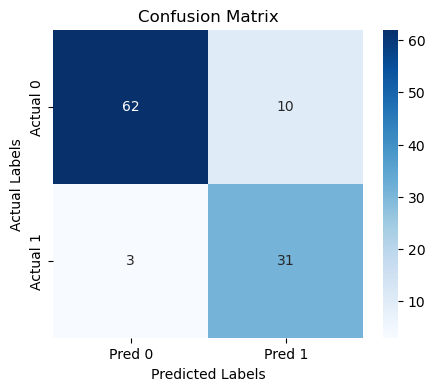

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        72
           1       0.76      0.91      0.83        34

    accuracy                           0.88       106
   macro avg       0.85      0.89      0.87       106
weighted avg       0.89      0.88      0.88       106



In [22]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns

y_pred = [1 if prob>=best_thresh else 0 for prob in y_pred_proba]

# Compute Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Compute Sensitivity and Specificity
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Specificity: {specificity:.2f}')
print(f'Sensitivity: {recall:.2f}')

# Visualise the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["True Negatives (TN)", "False Positives (FP)", "False Negatives (FN)", "True Positives (TP)"]

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


# Visualise the classification report
report = classification_report(y_test, y_pred)
print(report)